# Data Preprocessing

Начнем работу с описания данных. Имеем в исходном датасете 4 переменных. Из них: независимые: направление ветра (Wind_direction), давление (Pressure), влажность (Humidity); зависимая прогнозируемая переменная - температура.
Для удобства переместим результурующую переменную в конец документа. Изменим формат документа конвертировав его из .xlsx в .csv
Изначально осуществим подготовку данных. Импортируем необходимые библиотеки, далее загрузим наш файл с данными.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('Control-2.csv', sep=',')

Выведем наши данные на экран. Имеем 4 столбца, 2184 строку.

In [3]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,90.9,880.7,98.8,2.9
1,91.1,880.6,99.1,2.9
2,93.9,880.5,99.3,2.9
3,88.8,880.5,99.3,3.0
4,88.6,880.4,99.3,3.1
...,...,...,...,...
2180,303.4,912.8,14.7,10.2
2181,299.4,913.0,14.8,10.0
2182,298.5,912.2,14.0,10.6
2183,300.5,912.1,13.3,10.7


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование: 'Wind_direction','Pressure','Humidity'.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


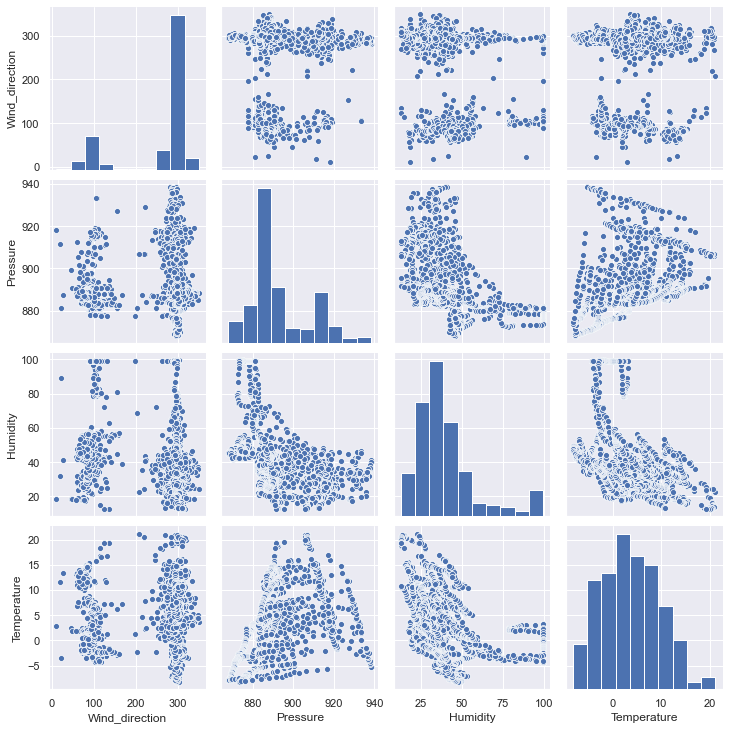

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

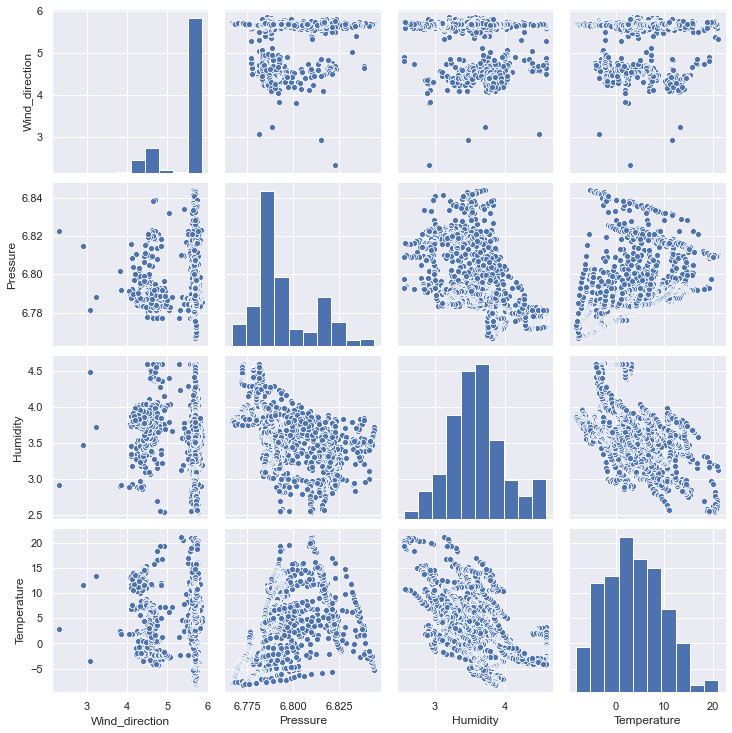

In [5]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Wind_direction','Pressure','Humidity']] = np.log(df_1[['Wind_direction','Pressure','Humidity']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным для нахождения переменных с пропущенными значениями.

In [6]:
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2185.000000,2185.000000,2185.000000,2185.000000
mean,252.943753,893.269428,40.120595,3.706545
std,83.667598,14.795880,18.856705,5.968682
min,10.100000,868.100000,12.800000,-8.200000
25%,271.300000,884.200000,28.000000,-1.300000
50%,293.300000,888.000000,35.700000,3.300000
75%,300.100000,902.300000,44.800000,7.600000
max,349.100000,938.400000,99.400000,21.200000


Осуществим работы с выбросами в числовых переменных, применив функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [7]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датасет уже очищенные от  выбросов переменные и выведем статистику повторно.
В результате выполнения очистки наблюдаем, что максимальное, минимальное, среднее значения, а также стандартное отклонение не изменились и соответствуют нормальному распределению. Это говорит об отсутствии выбросов.

In [8]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2185.000000,2185.000000,2185.000000,2185.000000
mean,252.943753,893.268369,40.002229,3.706545
std,83.667598,14.792679,18.489305,5.968682
min,10.100000,868.100000,12.800000,-8.200000
25%,271.300000,884.200000,28.000000,-1.300000
50%,293.300000,888.000000,35.700000,3.300000
75%,300.100000,902.300000,44.800000,7.600000
max,349.100000,937.657067,96.690709,21.200000


Проверим типы данных по переменным для выявления соответствий.

In [9]:
df.dtypes

Wind_direction    float64
Pressure          float64
Humidity          float64
Temperature       float64
dtype: object

Следующий этап подготовки данных состоит в поиске пропущеных значений. Для этого выведем общее количество и процент пропусков по переменным. Как мы видим - пропуски отсутствуют. Этот вывод мы также сделали ранее, исходя из статистики.

In [10]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Humidity,0,0.0
Pressure,0,0.0
Wind_direction,0,0.0


В результате подготовки данных мы получаем подготовленный набор данных, который можно использовать для  дальнешего моделирования.

# Linear Regression

Следующий этап нашей работы будет состоять в построении многофакторной линейной регрессии. Построим корреляционную матрицую Данная матрица необходима для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
Как можно определить изначально, большее влияние имеет переменная Humidity, потом Pressure и потом Wind_direction.

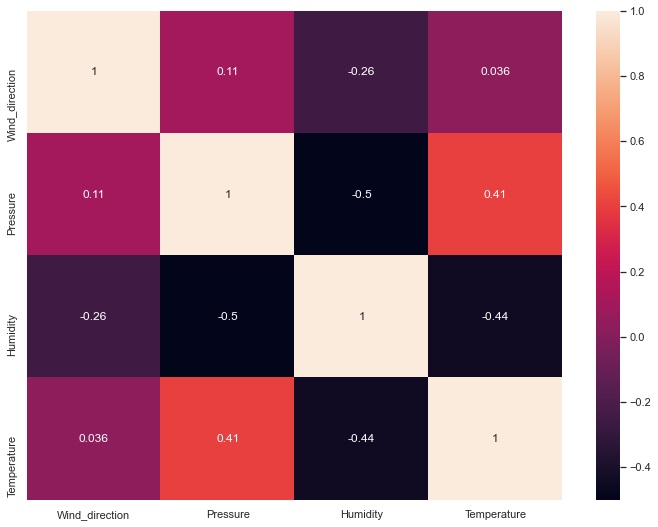

In [11]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Разделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [12]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу. Выведем статистику по ней.

In [13]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     195.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          4.78e-109
Time:                        18:25:05   Log-Likelihood:                -5339.7
No. Observations:                1748   AIC:                         1.069e+04
Df Residuals:                    1744   BIC:                         1.071e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.7083      8.815     -9.723      0.000    -102.997     -68.420
x1            -0.0058      0.002     -3.809      0.000      -0.009      -0.003
x2             0.1065      0.010     11.022      0.000       0.088       0.125
x3            -0.1063      0.008    -13.290      0.000      -0.122      -0.091
==============================================================================
Omnibus:                       27.540   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.227
Skew:                           0.161   Prob(JB):                     4.05e-05
Kurtosis:                       2.582   Cond. No.                     6.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как показала статистика, все переменные модели оказались значимыми. Коэффициент детерминации низкий, однако модель значимая.
Были поведены модификации исходной модели путем исключения/добавления факторов, однако диапазон изменения среднеквадратической ошибки был крайне незначительным, а значение R^2 только сокращалось. Поэтому было принято решение включить в окончательный вариант многофакторной регрессии все переменные.
Имеем два предупреждения: 1. Стандартные ошибки предполагают, что ковариационная матрица ошибок указана правильно.
    2.Число Cond. No. больше, 6,67e + 04. Это может указывать на сильную мультиколлинеарность или другие числовые проблемы.
Можем сделать вывод, что в данной модели присутствует мультиколинеарность. 
Для нашей модели оставим все три фактора, т.к. все переменные модели оказались значимыми.


In [14]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:,[0, 1 ,2] ]

In [15]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии

In [16]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-0.00578357,  0.10648252, -0.10634075]), -85.70830853782867)

Строим прогноз на тестовых значениях:

In [17]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации. Видим, что на тестовых значениях он немного ниже.

In [18]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.251182831666124, 0.21278879641552473)

Находим среднеквадратическое отклонение, которое на тестовых значениях немного превышает. Это означаает то, что модель немного переобучилась.

In [19]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(26.353973571604616, 29.337446345190877)

Строим график по наиболее значимой переменной для визуализации результата. Видим, функция предсказания работает но не очень удачно.

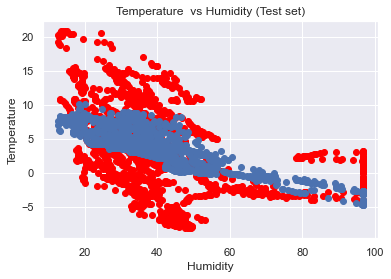

In [20]:
# Visualising the train set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], mr.predict(X_train), 'bo')
plt.title('Temperature  vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

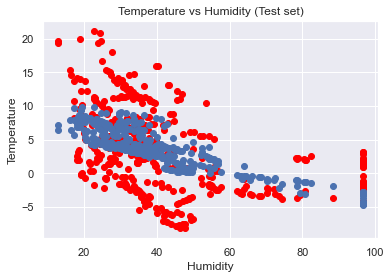

In [21]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейронной сети. Сохраним данные, полученные на данном этапе, для последующей работы с ними.

In [22]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('Control-2_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# Regression Neural Network

Импортируем подготовленные данные из сохраненого файла. Переносим в переменные соответствующие записи.

In [23]:
# Importing prepared dataset
import pickle
input = open('Control-2_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Произведем шкалирование данных. Использя выборку train оценим параметры. Преобразуем обучающую и тестовую выборки.

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [25]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Создаем последовательную нейронную сеть: 
Добавляем к ней слои, где размерность входного слоя будет равна 3, т.к. имеем в предыдущей модели три переменных, число нейронов на выходном слое задаем равным 6, так как модель расширяющаяся, функция активации на первом слое-гиперболический тангенс.
На втором слое количество нейронов оставляем равным 6, та же функция активации.
На последнем слое используем линейную функцию активации.

In [26]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(units = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Обучаем модель партиями по 10 объектов в течении 100 эпох.

In [27]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7935 - accuracy: 0.0000e+00
Epoch 2/100
175/175 [==============================] - 0s 800us/step - loss: 0.6820 - accuracy: 0.0000e+00
Epoch 3/100
175/175 [==============================] - 0s 777us/step - loss: 0.6666 - accuracy: 0.0000e+00
Epoch 4/100
175/175 [==============================] - 0s 815us/step - loss: 0.6525 - accuracy: 0.0000e+00
Epoch 5/100
175/175 [==============================] - 0s 846us/step - loss: 0.6377 - accuracy: 0.0000e+00
Epoch 6/100
175/175 [==============================] - 0s 800us/step - loss: 0.6238 - accuracy: 0.0000e+00
Epoch 7/100
175/175 [==============================] - 0s 777us/step - loss: 0.6069 - accuracy: 0.0000e+00
Epoch 8/100
175/175 [==============================] - 0s 800us/step - loss: 0.5936 - accuracy: 0.0000e+00
Epoch 9/100
175/175 [==============================] - 0s 790us/step - loss: 0.5816 - accuracy: 0.0000e+00
Epoch 10/100
175/175 [=================

175/175 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.0000e+00
Epoch 78/100
175/175 [==============================] - 0s 980us/step - loss: 0.4768 - accuracy: 0.0000e+00
Epoch 79/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.0000e+00
Epoch 80/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.0000e+00
Epoch 81/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.0000e+00
Epoch 82/100
175/175 [==============================] - 0s 983us/step - loss: 0.4740 - accuracy: 0.0000e+00
Epoch 83/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.0000e+00
Epoch 84/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.0000e+00
Epoch 85/100
175/175 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.0000e+00
Epoch 86/100
175/175 [==============================] -

Строим прогноз на тестовом множестве.

In [28]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [29]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [30]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

17.612329562913573

Видим, что MSE в модели нейронной сети (17.599022534318554) значительно сократилась по сравнения с моделью регрессии (29.337446345190877).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

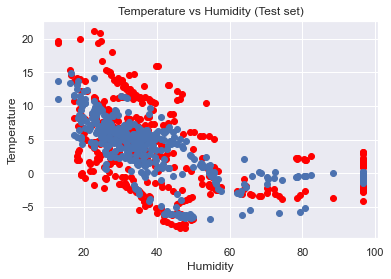

In [31]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

В итоге получим более качественный результат по сравнению с моделью регрессии.